In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score


df = pd.read_csv('final_preprocessed_without_outliers.csv')

Y = df['trip_distance(km)']
X = df.drop(columns=['trip_distance(km)'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [26]:
print("Shape of X train : ", X_train.shape)
print("Shape of X test : ", X_test.shape)

Shape of X train :  (2609, 11)
Shape of X test :  (653, 11)


C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\navee\anaconda3\lib\si

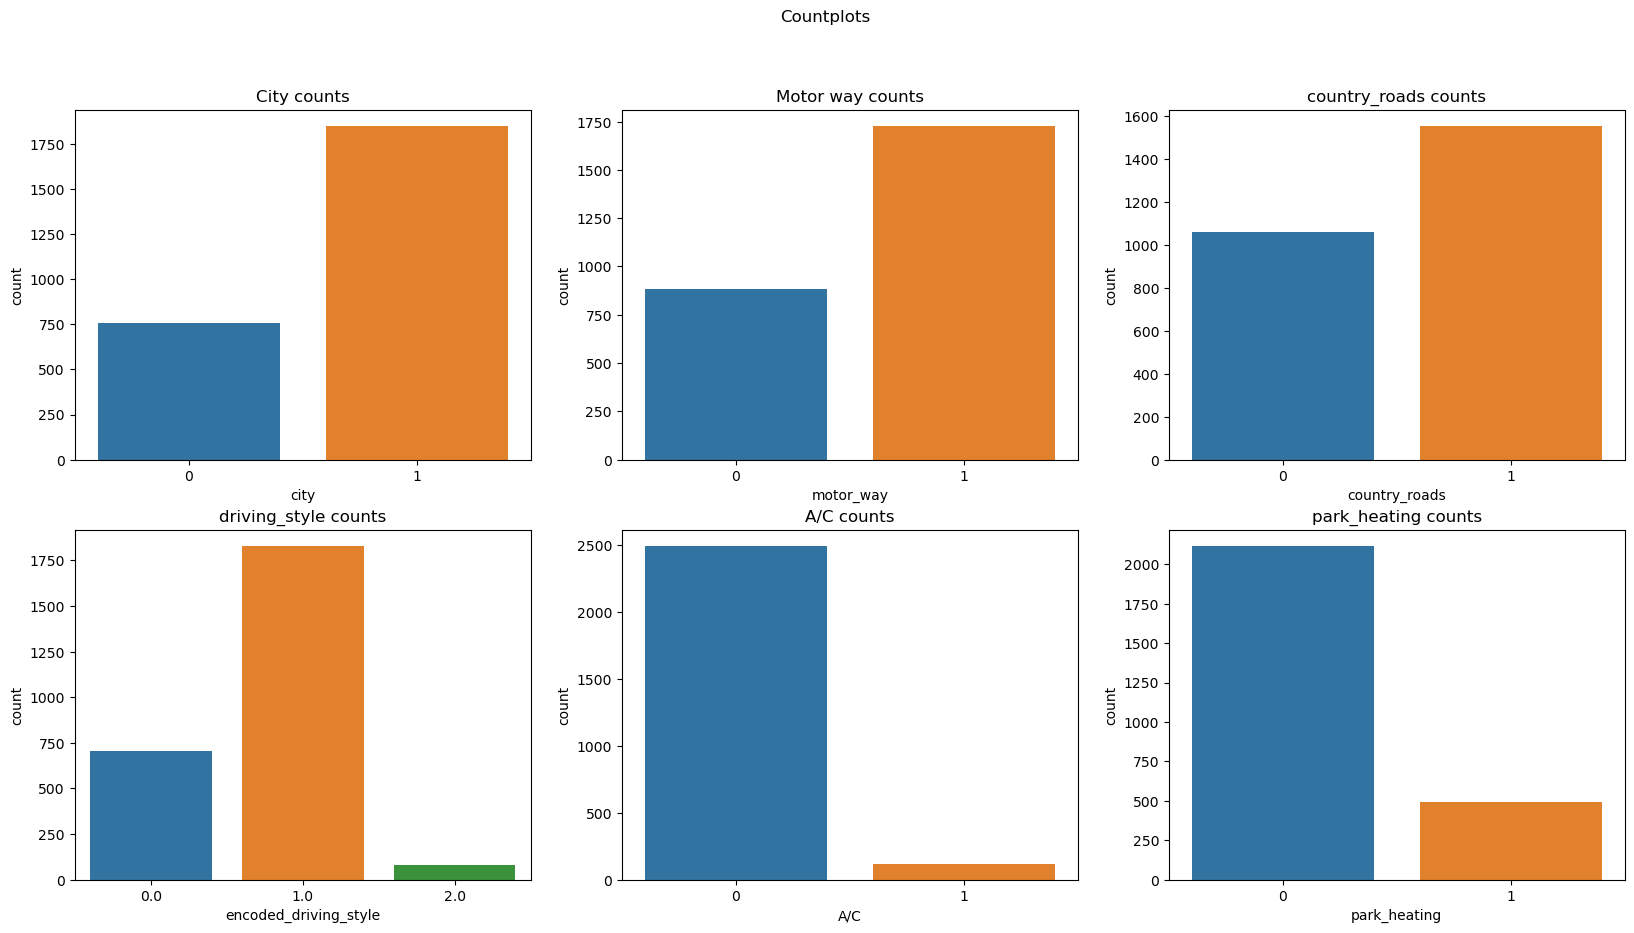

In [27]:
import matplotlib.pyplot as plt
import seaborn as sb
# city
plt.figure(figsize=(20, 10))
plt.suptitle("Countplots")
plt.subplot(2, 3, 1)
plt.title("City counts")
sb.countplot(X_train['city'])

plt.subplot(2, 3, 2)
plt.title("Motor way counts")
sb.countplot(X_train['motor_way'])

plt.subplot(2, 3, 3)
plt.title("country_roads counts")
sb.countplot(X_train['country_roads'])

plt.subplot(2, 3, 4)
plt.title("driving_style counts")
sb.countplot(X_train['encoded_driving_style'])

plt.subplot(2, 3, 5)
plt.title("A/C counts")
sb.countplot(X_train['A/C'])

plt.subplot(2, 3, 6)
plt.title("park_heating counts")
sb.countplot(X_train['park_heating'])

plt.show()

C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\navee\anaconda3\lib\si

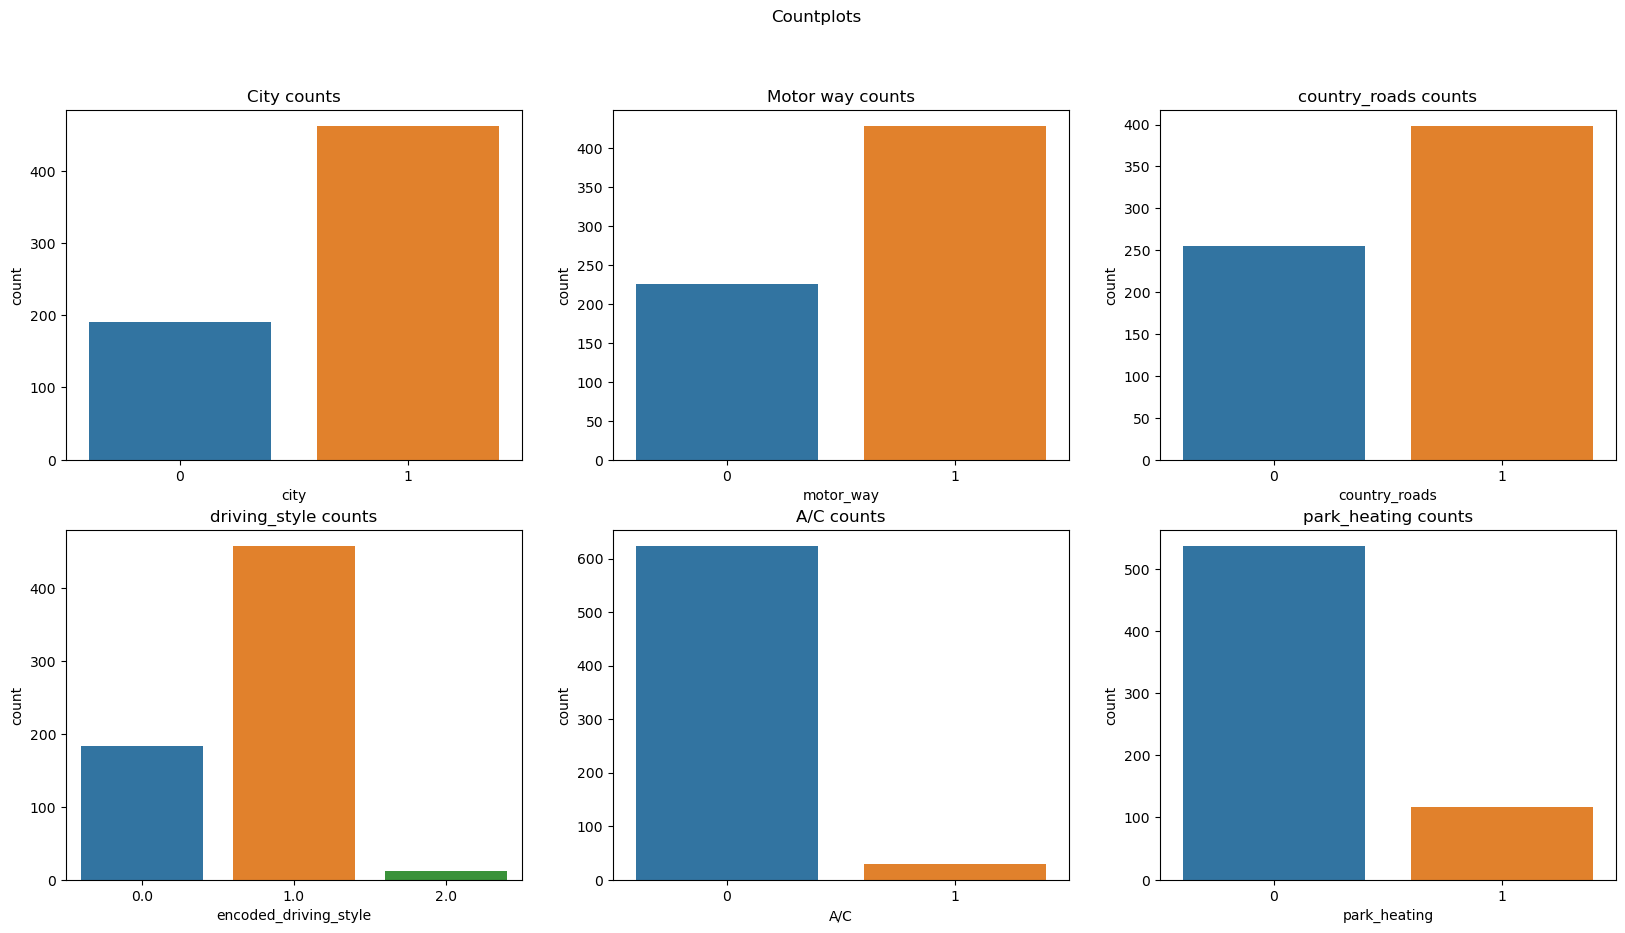

In [28]:
# city
plt.figure(figsize=(20, 10))
plt.suptitle("Countplots")
plt.subplot(2, 3, 1)
plt.title("City counts")
sb.countplot(X_test['city'])

plt.subplot(2, 3, 2)
plt.title("Motor way counts")
sb.countplot(X_test['motor_way'])

plt.subplot(2, 3, 3)
plt.title("country_roads counts")
sb.countplot(X_test['country_roads'])

plt.subplot(2, 3, 4)
plt.title("driving_style counts")
sb.countplot(X_test['encoded_driving_style'])

plt.subplot(2, 3, 5)
plt.title("A/C counts")
sb.countplot(X_test['A/C'])

plt.subplot(2, 3, 6)
plt.title("park_heating counts")
sb.countplot(X_test['park_heating'])

plt.show()

In [29]:
from sklearn.ensemble import RandomForestRegressor


In [30]:
model=RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [31]:
y_pred=model.predict(X_test)


In [32]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.9138875303702173

In [33]:
imp=np.array([8.68,0,1,1,18.0,0,1,58.0,1.2,0.0,1])

ip=imp.reshape(1,-1)
print("range estimation:")
model.predict(ip)

range estimation:


C:\Users\navee\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([47.22])

In [34]:

from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
mape = np.mean(np.abs(( Y_test- y_pred) / np.abs(Y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 6.084333843797856
Mean Squared Error (MSE): 174.79985535987748
Root Mean Squared Error (RMSE): 13.221189634820215
Mean Absolute Percentage Error (MAPE): 20.4
Accuracy: 79.6


In [35]:
from sklearn.metrics import mean_absolute_error
y_pred=model.predict(X_test)
mae=mean_absolute_error(Y_test,y_pred)
mae

6.084333843797856

In [36]:
d=pd.DataFrame(data={"actv":Y_test,"pred":y_pred})
d

,actv,pred
909,4.0,3.95
1536,4.0,3.96
2160,20.0,20.00
480,84.0,73.73
1561,33.0,31.78
...,...,...
649,87.0,92.81
1558,2.0,2.00
2273,3.0,3.00
981,20.0,19.74
